   ## Diabetes Prediction
    

In [ ]:
#Imorting all the packages to work with classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [55]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data understanding 

In [56]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Checking if the columns have 0 values



In [58]:
#Glucose, skinthickness, blood pressure, BMI, and Insulin can never be zero.
# To change that all zeros to null values now we fill replace/remove null values.
#to mark missing values and results, and even default parameters
for i in diabetes.columns:
    print(i,len(diabetes[diabetes[i] == 0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


# Replacing NAN with 0 values

In [59]:
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [60]:
diabetes = diabetes.fillna(method = 'ffill')
diabetes = diabetes.fillna(method = 'bfill')
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data is clean let's move forward


# 2. Data Visualization

In [ ]:
# Plotting
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Outcome', y = 'BloodPressure', data = diabetes)

Here, the higher bloodpressure has more chance of diabetes.

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

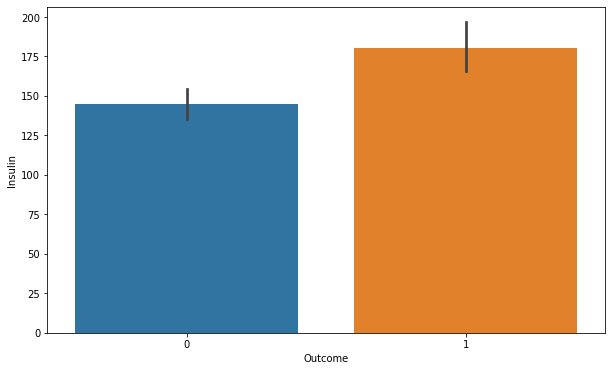

In [61]:
# Plotting
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Outcome', y = 'Insulin', data = diabetes)

Higher the insulin, more chances of getting diabetes.

In [ ]:
# Plotting
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Outcome', y = 'BMI', data = diabetes)

Chances of Diabeties increases with BMI

# 3. Model Spliting

In [ ]:
#Spliiting into train and test data for making model.
#here axis 0 represent row,axis 1 represent column
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [ ]:
#training set—a subset to train a model.
#test set—a subset to test the trained model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()


In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

# Logistic Regression
Predicting the probability of a categorical dependent variable with Logistic regresssion

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred_lr = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

model_score = model.score(X_train,y_train)
print(model_score)

model_score = model.score(X_test,y_test)
print(model_score)

The Accuracy is 74%.

# 4.Random Forest Classifier

In [ ]:
print(len(X_train.columns))
print(round(len(X_train.columns)**0.5,1))

Here the max feature ranges between 2.8 and 8

In [ ]:
rfcl = RandomForestClassifier(n_estimators=50, random_state=42, max_features=4)
rfcl = rfcl.fit(X_train, y_train)

y_pred_rf = rfcl.predict(X_test)

print(rfcl.score(X_test,y_test))

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf))

The Accuracy of RandomForest is also 74%

In [ ]:
#For KNN classification
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [ ]:
diabetes = {"Model name": ["Logistic Regression","KNN", "Random Forest Classifier"], "Accuracy(%)": ["74", "73.16", "74"]}
Comparision = pd.DataFrame(diabetes)
Comparision

# GridSearchCV

In [ ]:
#Finding best parameters for our Logistic classifier model
from sklearn.model_selection import GridSearchCV, StratifiedKFold,StratifiedShuffleSplit
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10,random_state=42, test_size = 0.25, train_size=None)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')

## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

In [ ]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

In [ ]:
### Using the best parameters from the grid-search for logistic regression.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

The accuracy increased from 74% to 77%

# random forest cross validation 

In [ ]:
rfcl_eval = cross_val_score(estimator = rfcl, X = X_train, y = y_train, cv = 10)
rfcl_eval.mean()

The accuracy increased from 74% to 76%

# GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y)

In [ ]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

In [ ]:
# rebuilding the model of random forest
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

Random forest accuracy increases from 77% to  87% using grid searchcv of random forest.

# 5. Feature Selection

In [ ]:
# Necessary Imports
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

In [ ]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
features_new = model.transform(X)

In [ ]:
features_new

In [ ]:
features_new.shape

# 6. Rebuilding Model

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
# Logistic Regressor
logreg = LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None,solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

using two ML algorithm (Logistic Resgressor and Random Forest Classifier) initial accuracies were both 74%:-

Logistic Regressor: model accuracy:- 74% Crossvallidation :- 76% Hyper tunning parameter using GridsearchCV:- LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l1', random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False) GridSearchCV best accuracy:-76%

Random Forest Classifier:- model trained accuracy:- 74% Crossvalidation:- 87% Hyper tunning parameter using GridsearchCV: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=9, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False) Best accuracy:-87%